# Python Tutorial on Topological Data Analysis (TDA) 

## Elizabeth Munch
 Dept of Computational Mathematics, Science and Engineering
 Dept of Mathematics
 Michigan State University

# Welcome

This notebook is meant to be a first step introduction to some available tools for computation of TDA signatures using python.  This repository includes the jupyter notebooks for the 2021 Workshop ["Mathematical and Computational Methods for Complex Social Systems"](https://www.google.com/url?q=https://meetings.ams.org/math/sc2021/meetingapp.cgi) to be held at the virtual JMM 2021, led by [Elizabeth Munch](http://elizabethmunch.com/). This introduction is tailored for a network science audience, so the focus is on an relevant tools when given a network input.

These slides are written to be presented as [RISE slides](https://rise.readthedocs.io/en/stable/index.html), however the notebook should be self contained without needing this installed. If you see a lot of weird cell toolbars in the notebook (which are used for controlling the slideshow version), these can be removed from your view of the jupyter notebook by going to View -> Cell Toolbar -> None













# Goals

- Give a brief overview of available packages
- Provide pipelines for computing persistent homology for input data such as a discrete metric space and a weighted graph.  


# Things I won't get to

- Graphical signatures of data
  - Reeb graphs
  - Mapper graphs 
  - Merge trees
  - Contour trees

# Options to follow along



- Download from the github repo: [github.com/lizliz/TDA-Python-Workshop-JMM21](https://github.com/lizliz/TDA-Python-Workshop-JMM21)
- Run directly from binder: [tinyurl.com/jmm-tda](https://tinyurl.com/jmm-tda)



# An incomplete list of available software




New packages are being developed incredibly quickly.  I'm so happy to see the field taking off so fast.  That being said, I am choosing to use some of the packages I am most familiar with, which does not mean they will be the best option for your task. An incomplete and almost immeidately outdated list of available options is below. 

The first list are the most generic which will likely get you through most tasks. In this tutorial, we will use the first two




- [SciKitTDA](https://scikit-tda.org/) by Nataniel Saul and Chris Tralie
- [Teaspoon](http://elizabethmunch.com/code/teaspoon/index.html) By Liz Munch and Firas Khasawneh
- [Ripser](https://github.com/Ripser/ripser) by Ulrich Bauer
- [GUDHI](http://gudhi.gforge.inria.fr/) developed at INRIA
- [Giotto-tda](https://giotto-ai.github.io/) developted at EPFL
- [Cubicle](https://bitbucket.org/hubwag/cubicle/src/master/) by Hubert Wagner
- [HomcCube](https://i-obayashi.info/software.html) By Ippei Obayashi.
- [DIPHA](https://github.com/DIPHA/dipha) by Ulrich Bauer and Michael Kerber
- [diamorse](https://github.com/AppliedMathematicsANU/diamorse) developed at The Australian National University.
- [Perseus](http://people.maths.ox.ac.uk/nanda/perseus/) by Vidit Nanda
- Dionysus2

In [14]:
# Basic imports 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from matplotlib.widgets import Slider, Button, RadioButtons
import networkx as nx


# scikit-tda imports..... Install all with -> pip install scikit-tda
#--- this is the main persistence computation workhorse
import ripser


# teaspoon imports...... Install with -> pip install teaspoon
#---these are for generating data and some drawing tools 
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

#---these are for generating time series network examples
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL



# Computing persistence on a point cloud



This covers point clouds in R^n inheriting Euclidean metric, as well as any other proximity or distance measure. 

## Annulus example

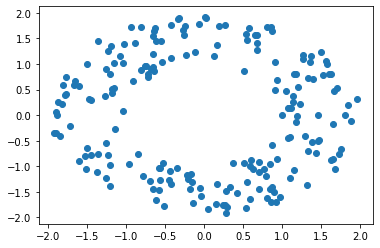

In [2]:
r = 1
R = 2

P = makePtCloud.Annulus(N=200, r=r, R=R, seed=None)
plt.scatter(P[:,0],P[:,1])

In [3]:
# Some quick code to draw stuff without showing all the matplotlib junk in the slides everytime. 

def drawTDAtutorial(P,diagrams, R = 2):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

    # Draw point cloud 
    plt.sca(axes[0])
    plt.title('Point Cloud')
    plt.scatter(P[:,0],P[:,1])

    # Draw diagrams
    plt.sca(axes[1])
    plt.title('0-dim Diagram')
    Draw.drawDgm(diagrams[0])

    plt.sca(axes[2])
    plt.title('1-dim Diagram')
    Draw.drawDgm(diagrams[1])
    plt.axis([0,R,0,R])

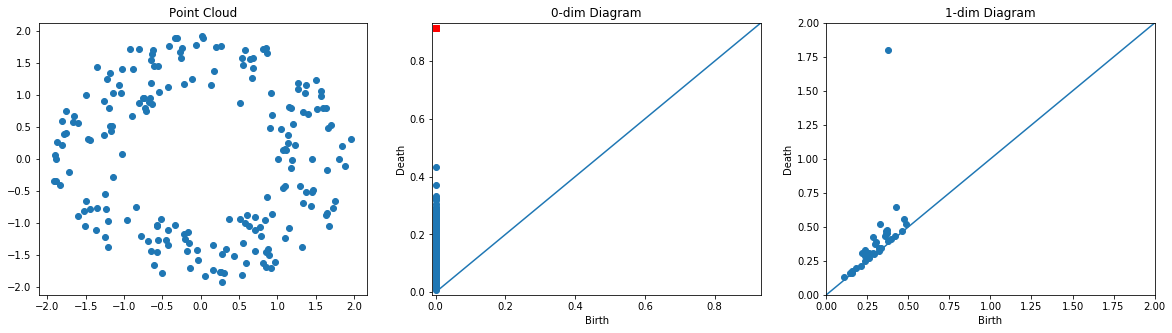

In [4]:
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams)  # Script included in notebook for drawing

In [5]:
# Some discussion of how diagrams are stored 

len(diagrams)

2

### Cube example

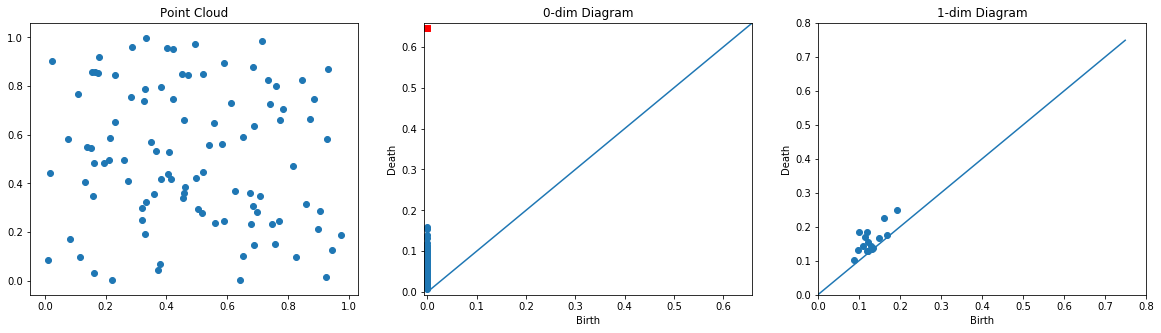

In [6]:
P = makePtCloud.Cube()
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams,R=0.8) # Script for drawing everything, code included in notebook


### Double Annulus example

In [7]:
# Make a quick double annulus

def DoubleAnnulus(r1 = 1, R1 = 2, r2 = .8, R2 = 1.3, xshift = 3):
    P = makePtCloud.Annulus(r = r1, R = R1)
    Q = makePtCloud.Annulus(r = r2, R = R2)
    Q[:,0] = Q[:,0] + xshift
    P = np.concatenate((P, Q) )
    return(P)

# P = DoubleAnnulus()
# plt.scatter(P[:,0], P[:,1])

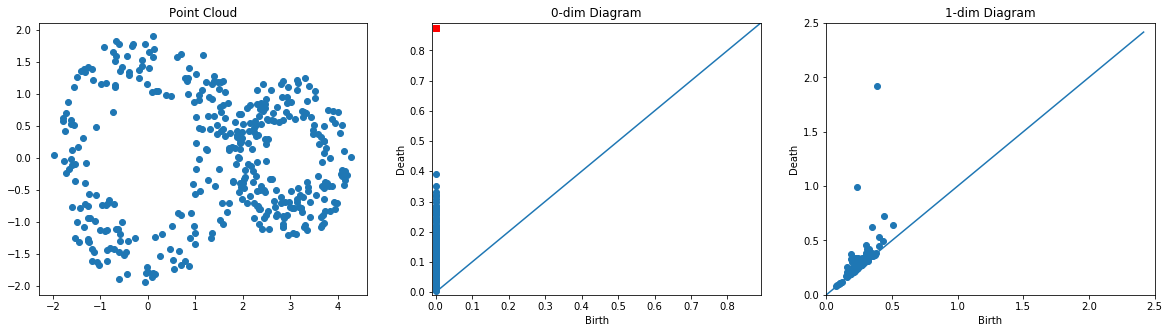

In [8]:
P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) # Code included in notebook
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
drawTDAtutorial(P,diagrams,R=2.5) # Script for drawing everything, code included in notebook


## Computing Persistence on a Pairwise Distance/Similarity Matrix 



In [9]:
print('TODO')

print(1 + 2)

TODO
3


### An example from networks computed from time series embeddings 

- TODO: Add something about the paper, maybe embed Audun's video?
- [Persistent Homology of Complex Networks for Dynamic State Detection. *Audun Myers, Elizabeth Munch, and Firas A. Khasawneh*. Physical Review E, 2019](https://doi.org/10.1103/PhysRevE.100.022314)

In [17]:
# Code to draw the next example later, here so it doesn't end up in a slide
def drawNetworkExample(gs,G,diagram):
    TextSize = 14
    plt.figure(2)
    plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(4, 2)

    ax = plt.subplot(gs[0:2, 0:2]) #plot time series
    plt.title('Time Series', size = TextSize)
    plt.plot(ts, 'k')
    plt.xticks(size = TextSize)
    plt.yticks(size = TextSize)
    plt.xlabel('$t$', size = TextSize)
    plt.ylabel('$x(t)$', size = TextSize)
    plt.xlim(0,len(ts))

    ax = plt.subplot(gs[2:4, 0])
    plt.title('Network', size = TextSize)
    nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
            width=1, font_size = 10, node_size = 30)

    ax = plt.subplot(gs[2:4, 1])
    plt.title('Persistence Diagram', size = TextSize)
    MS = 3
    top = max(diagram[1].T[1])
    plt.plot([0,top*1.25],[0,top*1.25],'k--')
    plt.yticks( size = TextSize)
    plt.xticks(size = TextSize)
    plt.xlabel('Birth', size = TextSize)
    plt.ylabel('Death', size = TextSize)
    plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
    plt.xlim(0,top*1.25)
    plt.ylim(0,top*1.25)

    plt.subplots_adjust(hspace= 0.8)
    plt.subplots_adjust(wspace= 0.35)
    plt.show()

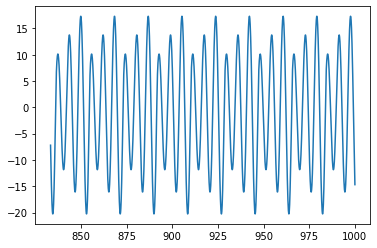

In [23]:
#generate time series
system = 'rossler'
dynamic_state = 'periodic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]

plt.plot(t,ts)

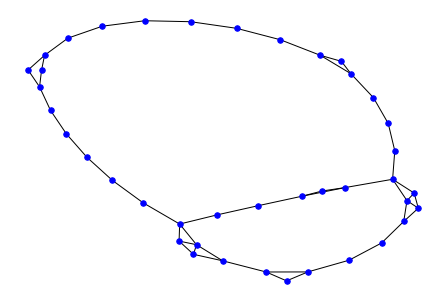

In [25]:
#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 2000, remove_deg_zero_nodes = True)

nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
            width=1, font_size = 10, node_size = 30)

1-D Persistent Homology (loops): 
 [[1. 9.]
 [1. 2.]
 [1. 5.]]


<Figure size 432x288 with 0 Axes>

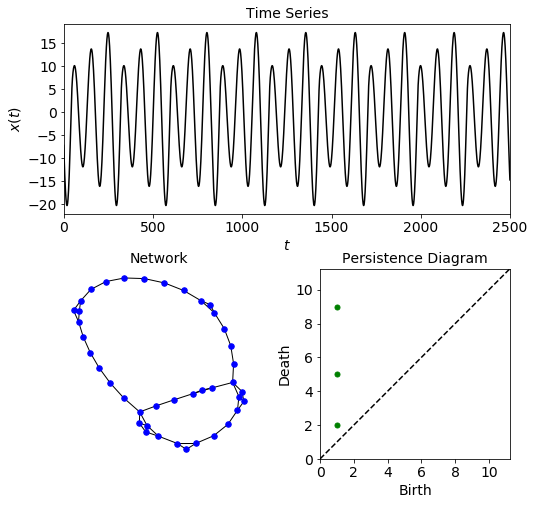

In [26]:
#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology (loops): \n', diagram[1])

drawNetworkExample(gs,G,diagram)

### The same example but with a chaotic time series 

<Figure size 432x288 with 0 Axes>

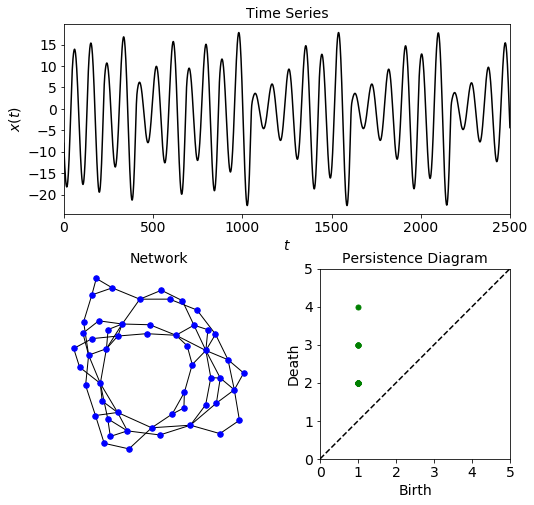

In [28]:
#generate time series
system = 'rossler'
dynamic_state = 'chaotic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]

#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 2000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
# print('1-D Persistent Homology (loops): \n', diagram[1])

drawNetworkExample(gs,G,diagram)

# Warning

Persistence diagrams can have multiplicity!

In [33]:
print('1-D Persistent Homology (loops): \n', diagram[1])
# plt.xlabel('Birth', size = TextSize)
# plt.ylabel('Death', size = TextSize)
# plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)

1-D Persistent Homology (loops): 
 [[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 3.]
 [1. 5.]
 [1. 2.]
 [1. 2.]]


# Computing persistence for a weighted graph as the 1-skeleton

V1 Just doing the clique complex 

Most useful/interesting when we have a decently dense graph

In [ ]:
n = 10
p = .4

# Generate random graph 
G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

m = len(G.edges)
print('There are', m,'edges.')

# Generate random edge weights in the interval [0,maxWeight]
maxWeight = 100
weights = np.random.randint(maxWeight, size = m)

for i, e in enumerate(G.edges()):
    G[e[0]][e[1]] ['weight'] = weights[i]



In [ ]:
#draw it!

pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=70)

# edges
nx.draw_networkx_edges(G, pos,  width=2)
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
# )

# labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels=nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G, 'weight'))

In [ ]:
# %matplotlib notebook
# from ipywidgets import *


# x = np.linspace(0, 2 * np.pi)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, np.sin(x))

# def update(w = 1.0):
#     line.set_ydata(np.sin(w * x))
#     fig.canvas.draw_idle()

# interact(update);
# plt.show()

In [ ]:
# V2 Vietoris Rips of the metric graph 

# Changing the simplicial complex definition 

In [ ]:
print('TODO')

# Distances between persistence diagrams 

In [ ]:
print('TODO')

# Featurization for ML interfaces 

In [ ]:
print('TODO')

In [12]:
from teaspoon.ML.feature_functions import PLandscape
from teaspoon.MakeData.PointCloud import testSetManifolds
# generate persistence diagrams
df = testSetManifolds(numDgms = 50, numPts = 100)
Diagrams_H1 = df['Dgm1']
# Compute the persistence landscapes
PLC = PLandscape(Diagrams_H1[0])
print(PLC.PL_number)
fig = PLC.PLandscape_plot(PLC.AllPL['Points'])  

ModuleNotFoundError: No module named 'PersistenceImages'

In [ ]:
PLC  = PLandscape(Diagrams_H1[0],[2,3])
fig = PLC.PLandscape_plot(PLC.AllPL['Points'],[2,3])  

In [ ]:
import numpy as np
from teaspoon.ML.feature_functions import PLandscape
import teaspoon.ML.PD_Classification as PD_CL
from teaspoon.ML.Base import LandscapesParameterBucket
from teaspoon.MakeData.PointCloud import testSetManifolds
from sklearn.svm import SVC
# generate persistence diagrams
df = testSetManifolds(numDgms = 10, numPts = 100)
Diagrams_H1= df['Dgm1'].sort_index().values
Labels = df['trainingLabel'].sort_index().values
#parameters for classification
params = LandscapesParameterBucket()
params.clf_model = SVC
params.test_size = 0.33
params.Labels = Labels
params.PL_Number = [1,2,3,4,5,6,7,8]
print(params)
# Compute the persistence landscapes
PerLand=np.ndarray(shape=(60),dtype=object)
for i in range(0, 60):
    Land=PLandscape(Diagrams_H1[i])
    PerLand[i]=Land.AllPL
# Perform classification
result = PD_CL.CL_PL(PerLand,params)

In [ ]:
import teaspoon.ML.feature_functions as Ff
from teaspoon.MakeData.PointCloud import testSetManifolds

# generate persistence diagrams
df = testSetManifolds(numDgms = 50, numPts = 100)
Diagrams_H1= df['Dgm1'].sort_index().values

TF_Learning = False
D_Img=[1,75]
plot=False
feature_PI = Ff.F_Image(Diagrams_H1,0.01,0.15,plot,TF_Learning, D_Img)
# if user wants to plot images
plot=True
feature_PI = Ff.F_Image(Diagrams_H1,0.01,0.15,plot,TF_Learning, D_Img)
fig = feature_PI['figures']


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:white;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}

</style>

# Thank you!!!

- Thanks to Audun Myers and Chris Tralie
- Wincoptop info


<table class="tg">

<tbody>
  <tr>
    <td class="tg-baqh">
        <img src = "https://evacenteno.com/wp-content/uploads/2015/08/icon-blue-email-294x300.png" alt = "email icon" style="width:30px;"/>
        <a href="mailto:muncheli@msu.edu">muncheli@msu.edu</a>
    </td>
    <td class="tg-baqh">
        <img src = "https://www.flaticon.com/svg/static/icons/svg/975/975645.svg" alt = "Website icon" style="width:30px;"/>
        <a href="http://elizabethmunch.com">elizabethmunch.com</a>
    </td>
    <td class="tg-baqh">
        <img src = "https://www.flaticon.com/svg/static/icons/svg/220/220233.svg" alt="Twitter icon"style="width:30px;"/>
        <a href="https://twitter.com/elizabethmunch">@elizabethmunch</a>
    </td>
    <td>
        <img src="https://www.nsf.gov/images/logos/NSF_4-Color_vector_Logo_thumb.jpg" alt="NSF Logo" style="width:80px">
      </td>
          <td>
        <img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg" alt="MSU CMSE Logo" style="width:80px">
      </td>
       
  </tr>
</tbody>
</table>


